In [1]:
from collections import defaultdict
from datetime import datetime
import os
import random

import json
import ast

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
sns.set(style='ticks', font_scale=1.2)

In [2]:
output_directory_path = ''

## **Load poetry data**

In [3]:
poems_df = pd.read_csv('')
len(poems_df)

3875

In [4]:
poems_df['poem_id'] = poems_df['poem_link'].apply(lambda x: '/'.join(x.split('/')[-2:]))

In [5]:
poems_df.sample(3)

,messy_author,author,additional_authors,birth_death_dates,poem_title,poem_text,form,tags,poem_source,poem_link,...,death_year,form_tags,theme_tags,occasion_tags,collected_from,also_appears_in_poetry_foundation,poem_title_lower,author_lower,form_group,poem_id
2255,By Matthew Nienow,Matthew Nienow,['By Matthew Nienow'],b. 1983,Ode to the Steam Box,The steam box is used for bending frames and...,ode,"['Appeared in Poetry Magazine', 'Related Audio...",Source:\n Poetry\n ...,https://www.poetryfoundation.org/poetrymagazin...,...,NaN,NaN,NaN,NaN,Poetry Foundation,NaN,ode to the steam box,matthew nienow,types/modes,56006/ode-to-the-steam-box
1042,By Kobayashi Issa,Kobayashi Issa,['By Kobayashi Issa'],1763–1828,[even with insects],"Even with insects— \nsome can sing, \n some...",haiku,"['Suitable for Children', 'Relationships', 'Pe...",[even with insects] by Issa from The Essential...,https://www.poetryfoundation.org/poems/52357/e...,...,NaN,NaN,NaN,NaN,Poetry Foundation,NaN,[even with insects],kobayashi issa,verse forms,52357/even-with-insects
1558,By G. K. Chesterton,G. K. Chesterton,['By G. K. Chesterton'],1874–1936,The Rolling English Road,Before the Roman came to Rye or out to Severn ...,ballad,"['Activities', 'Travels & Journeys', 'Arts & S...",NaN,https://www.poetryfoundation.org/poems/48212/t...,...,NaN,NaN,NaN,NaN,Poetry Foundation,NaN,the rolling english road,g. k. chesterton,verse forms,48212/the-rolling-english-road


In [6]:
poem_forms_dict = defaultdict(list)
form_poems_dict = defaultdict(list)
for i, r in poems_df.iterrows():
    poem_forms_dict[r['poem_id']].append(r['form'])
    form_poems_dict[r['form']].append(r['poem_id'])
len(poem_forms_dict), len(form_poems_dict)

(3692, 23)

In [7]:
for _form, _poems in sorted(form_poems_dict.items(), key=lambda x: len(x[1]), reverse=True):
    print(len(_poems), '\t', _form)

857 	 sonnet
475 	 prose poem
398 	 couplet
387 	 free verse
254 	 elegy
209 	 blank verse
191 	 dramatic monologue
145 	 ekphrasis
119 	 ode
112 	 common measure
110 	 ballad
94 	 ars poetica
94 	 tercet
89 	 quatrain
75 	 pastoral
63 	 villanelle
50 	 haiku
41 	 sestina
40 	 ghazal
25 	 pantoum
24 	 concrete or pattern poetry
16 	 aubade
7 	 limerick


In [8]:
line_df = pd.read_csv('')
len(line_df.index)

134459

In [9]:
line_df.sample(3)

,Unnamed: 0,line_id,poem_id,line_num,text
69325,69325,43317/the-lovers-of-the-poor_88,43317/the-lovers-of-the-poor,88,"To no more Possibilities, to get"
121022,121022,48613/the-inheritance-56d229fe6125a_52,48613/the-inheritance-56d229fe6125a,52,"Today, in the last moments of light"
25820,25820,47428/the-comedian-as-the-letter-c_123,47428/the-comedian-as-the-letter-c,123,Found his vicissitudes had much enlarged


In [10]:
line_poem_dict = {r['line_id']: r['poem_id'] for i, r in line_df.iterrows()}
len(line_poem_dict)

134459

In [11]:
poem_lines_dict = defaultdict(list)
for i, r in line_df.iterrows():
    poem_lines_dict[r['poem_id']].append(r['line_id']) 
len(poem_lines_dict)

3684

In [12]:
line_text_dict = {r['line_id']: r['text'] for i, r in line_df.iterrows()}
len(line_text_dict)

134459

## **Load WIMBD query results**

In [13]:
df_list = []
for _file_name in os.listdir(output_directory_path + '/wimbd-results'):
    if _file_name.startswith('wimbd_results') and _file_name.endswith('.csv'):
        _df = pd.read_csv(output_directory_path + '/wimbd-results/' + _file_name)
        if 'queried_text' in _df.columns:
            _df = _df.drop(columns=['queried_text'])
        df_list.append(_df)

results_df = pd.concat(df_list)
len(results_df.index)

399643

In [14]:
# results_df = results_df.drop(columns=['queried_text'])

In [15]:
results_df.head(3)

,Unnamed: 0,_index,_id,_score,_source,poem_id,line_num,line_id
0,0,docs_v1.5_2023-11-02,8ed89005962d54b8b6b5e3aa07b7f09b,31.320835,"{'id': '8ed89005962d54b8b6b5e3aa07b7f09b', 'do...",44904/imitations-of-horace,228.0,44904/imitations-of-horace_228
1,1,docs_v1.5_2023-11-02,33ed9aad3f86ac6c2eaad3b5d766e9b3,31.152828,"{'id': '33ed9aad3f86ac6c2eaad3b5d766e9b3', 'do...",44904/imitations-of-horace,228.0,44904/imitations-of-horace_228
2,2,docs_v1.5_2023-11-02,96937cd7f4e393586c7e931d65b2395b,29.470413,"{'id': '96937cd7f4e393586c7e931d65b2395b', 'do...",44904/imitations-of-horace,228.0,44904/imitations-of-horace_228


In [16]:
results_df['_source'] = results_df['_source'].apply(ast.literal_eval)

In [17]:
dict_df = pd.json_normalize(results_df['_source'])

In [18]:
dict_df.sample(3)

,id,dolma_id,archive,line,source,title,snippet,text,word_count,url,...,metadata.www.gutenberg.org/2009/pgterms/marc260,metadata.www.gutenberg.org/2009/pgterms/marc508,metadata.www.gutenberg.org/2009/pgterms/marc904,metadata.www.gutenberg.org/2009/pgterms/marc905,metadata.www.gutenberg.org/2009/pgterms/marc906,metadata.www.gutenberg.org/2009/pgterms/marc907,metadata.revid,metadata.www.gutenberg.org/2009/pgterms/marc440,metadata.www.gutenberg.org/2009/pgterms/marc901,metadata.purl.org/dc/terms/alternative
64913,a0c6b60c6f7e8523b2fa2f67a89452c4,https://anandamargaforum.wordpress.com/2013/04...,s3://ai2-llm/pretraining-data/sources/olmo-mix...,1376175,common-crawl,Note: This short story is related with one ver...,Note: This short story is related with one ver...,Note: This short story is related with one ver...,1415,https://anandamargaforum.wordpress.com/2013/04...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155616,859fcf51f72a5e1ff2259bb2cdbb8070,e5d917b457f5387b7bb2e2330b316d97,s3://ai2-llm/pretraining-data/sources/olmo-mix...,3166269,c4,"lost, and the vast waters close traps of fear ...","lost, and the vast waters close traps of fear ...","lost, and the vast waters close traps of fear ...",51,https://matthewritger.com/2012/10/29/the-waste...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266961,174b68c608d53f9d66fd14e0f4285025,https://books.google.ie/books?id=FIUBAAAAQAAJ&...,s3://ai2-llm/pretraining-data/sources/olmo-mix...,117347,common-crawl,"Page 108 - After laying down my pen, I took se...","Page 108 - After laying down my pen, I took se...","Page 108 - After laying down my pen, I took se...",252,https://books.google.ie/books?id=FIUBAAAAQAAJ&...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
results_df.reset_index(drop=True, inplace=True)
dict_df.reset_index(drop=True, inplace=True)

results_df = pd.concat([results_df, dict_df], axis=1)

len(results_df.index)

399643

In [20]:
results_df.sample(3)

,Unnamed: 0,_index,_id,_score,_source,poem_id,line_num,line_id,id,dolma_id,...,metadata.www.gutenberg.org/2009/pgterms/marc260,metadata.www.gutenberg.org/2009/pgterms/marc508,metadata.www.gutenberg.org/2009/pgterms/marc904,metadata.www.gutenberg.org/2009/pgterms/marc905,metadata.www.gutenberg.org/2009/pgterms/marc906,metadata.www.gutenberg.org/2009/pgterms/marc907,metadata.revid,metadata.www.gutenberg.org/2009/pgterms/marc440,metadata.www.gutenberg.org/2009/pgterms/marc901,metadata.purl.org/dc/terms/alternative
326174,123,docs_v1.5_2023-11-02,dec4fff189596dc128d4c2eb8dfac76f,58.245148,"{'id': 'dec4fff189596dc128d4c2eb8dfac76f', 'do...",52610/a-little-called-pauline,2.0,52610/a-little-called-pauline_2,dec4fff189596dc128d4c2eb8dfac76f,http://littlereview.blogspot.com/2013/06/poem-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378261,49,docs_v1.5_2023-11-02,24c561575442f964e470e141094d6cbf,0.283905,"{'id': '24c561575442f964e470e141094d6cbf', 'do...",43947/the-dying-child,24.0,43947/the-dying-child_24,24c561575442f964e470e141094d6cbf,70f46166d9a0af6f70d3983044c1c750aaa5f9c5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202999,12,docs_v1.5_2023-11-02,da61d06c46a3e146f29c0d9df946aed7,11.648190,"{'id': 'da61d06c46a3e146f29c0d9df946aed7', 'do...",54718/she-is,14.0,54718/she-is_14,da61d06c46a3e146f29c0d9df946aed7,http://robmclennan.blogspot.com/2004/08/?m=0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
list(results_df.columns)

['Unnamed: 0',
 '_index',
 '_id',
 '_score',
 '_source',
 'poem_id',
 'line_num',
 'line_id',
 'id',
 'dolma_id',
 'archive',
 'line',
 'source',
 'title',
 'snippet',
 'text',
 'word_count',
 'url',
 'domain',
 'added',
 'created',
 'metadata.bucket',
 'metadata.cc_segment',
 'metadata.date_download',
 'metadata.digest',
 'metadata.language',
 'metadata.language_score',
 'metadata.length',
 'metadata.line_ids',
 'metadata.nlines',
 'metadata.original_length',
 'metadata.original_nlines',
 'metadata.perplexity',
 'metadata.source_domain',
 'metadata.title',
 'metadata.url',
 'metadata.alphanum_fraction',
 'metadata.avg_line_length',
 'metadata.ext',
 'metadata.max_forks_count',
 'metadata.max_forks_repo_forks_event_max_datetime',
 'metadata.max_forks_repo_forks_event_min_datetime',
 'metadata.max_forks_repo_head_hexsha',
 'metadata.max_forks_repo_licenses',
 'metadata.max_forks_repo_name',
 'metadata.max_forks_repo_path',
 'metadata.max_issues_count',
 'metadata.max_issues_repo_head_he

## **Examine sources and domains**

### Count sources

In [22]:
for k, v in results_df['source'].value_counts(dropna=False).items():
    print(v, '\t', k)

316501 	 common-crawl
40724 	 stack-dedup
16560 	 c4
15256 	 gutenberg
9773 	 reddit
442 	 s2
387 	 wikipedia


### Count archives

In [23]:
limit = 0
for k, v in results_df['archive'].value_counts(dropna=False).items():
    if limit < 20:
        print(v, '\t', k)
        limit += 1

6997 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/books/books-0001.json.gz
6784 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/books/books-0000.json.gz
2582 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0122.json.gz
2224 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0042.json.gz
2134 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0132.json.gz
2071 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0113.json.gz
2008 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/cc_en_tail/cc_en_tail-0101.json.gz
1804 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0072.json.gz
1800 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-0115.json.gz
1733 	 s3://ai2-llm/pretraining-data/sources/olmo-mix/v1_5/documents/stack/stack-v4-train-

### Count domains

In [24]:
limit = 0
for k, v in results_df['domain'].value_counts(dropna=False).items():
    if limit < 20:
        print(v, '\t', k)
        limit += 1

40724 	 github.com
17646 	 None
7383 	 reddit.com
5936 	 books.google.de
5089 	 google.cat
4923 	 engpoetry.com
4275 	 www.thefreedictionary.com
4006 	 books.google.co.uk
3658 	 books.google.rs
3624 	 books.google.com.hk
3441 	 books.google.es
3241 	 books.google.ee
3238 	 books.google.am
3236 	 books.google.bg
3126 	 www.poetrysoup.com
3065 	 books.google.com.eg
3010 	 books.google.ru
2887 	 books.google.com.mx
2850 	 books.google.co.in
2826 	 books.google.com.br


In [25]:
domain_count_dict = defaultdict(int)

for _domain, _count in results_df['domain'].value_counts(dropna=False).items():

    if not pd.isnull(_domain) and _domain.startswith('books.google'):
        _domain = 'books.google'
        
    domain_count_dict[_domain] += _count

for _domain, _count in sorted(domain_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _domain)

113373 	 books.google
40724 	 github.com
17646 	 None
7383 	 reddit.com
5089 	 google.cat
4923 	 engpoetry.com
4275 	 www.thefreedictionary.com
3126 	 www.poetrysoup.com
2611 	 quotes.yourdictionary.com
2555 	 www.free-translator.com
2290 	 poets.org
2152 	 milton.thefreelibrary.com
2110 	 www.hotfreebooks.com
1875 	 hotfreebooks.com
1589 	 www.poemhunter.com
1263 	 www.diccionarioingles.com
1218 	 m.poemhunter.com
1026 	 rpo.library.utoronto.ca
913 	 acronyms.thefreedictionary.com
881 	 www.poemz.org


**Note:** Need to handle the null cases; these are always Gutenberg or Reddit, so replace with source.

In [26]:
domain_lines_count_dict = defaultdict(int)

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    domain_lines_count_dict[_domain] += 1

for _domain, _count in sorted(domain_lines_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _domain)

113373 	 books.google
40724 	 github.com
15363 	 gutenberg.org
9773 	 reddit.com
5089 	 google.cat
4923 	 engpoetry.com
4275 	 www.thefreedictionary.com
3126 	 www.poetrysoup.com
2611 	 quotes.yourdictionary.com
2555 	 www.free-translator.com
2290 	 poets.org
2152 	 milton.thefreelibrary.com
2110 	 www.hotfreebooks.com
1875 	 hotfreebooks.com
1589 	 www.poemhunter.com
1263 	 www.diccionarioingles.com
1218 	 m.poemhunter.com
1026 	 rpo.library.utoronto.ca
913 	 acronyms.thefreedictionary.com
881 	 www.poemz.org


### Look for domains with unique lines, not all instances of a line in a domain

In [27]:
domain_poems_dict = defaultdict(list)

for i, r in results_df.iterrows():
    
    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    domain_poems_dict[_domain].append(r['line_id'])

domain_count_dict = {_domain: len(list(set(_poems))) for _domain, _poems in domain_poems_dict.items()}

for _domain, _count in sorted(domain_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _domain)

21364 	 github.com
20129 	 books.google
10058 	 gutenberg.org
6319 	 reddit.com
2450 	 google.cat
2431 	 www.poetrysoup.com
2300 	 www.thefreedictionary.com
2070 	 engpoetry.com
1987 	 www.hotfreebooks.com
1968 	 milton.thefreelibrary.com
1936 	 www.free-translator.com
1840 	 hotfreebooks.com
1482 	 www.poemhunter.com
1248 	 quotes.yourdictionary.com
1248 	 poets.org
1145 	 m.poemhunter.com
1094 	 www.diccionarioingles.com
881 	 www.poemz.org
806 	 paradiselost.org
771 	 www.poemine.com


### Redo domains with number of unique poems, not lines

In [28]:
domain_poems_dict = defaultdict(list)

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    domain_poems_dict[_domain].append(r['poem_id'])

domain_count_dict = {_domain: len(list(set(_poems))) for _domain, _poems in domain_poems_dict.items()}

for _domain, _count in sorted(domain_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', domain_lines_count_dict[_domain], '\t', _domain)

740 	 40724 	 github.com
733 	 9773 	 reddit.com
545 	 113373 	 books.google
477 	 4923 	 engpoetry.com
431 	 15363 	 gutenberg.org
256 	 2290 	 poets.org
243 	 1589 	 www.poemhunter.com
217 	 2611 	 quotes.yourdictionary.com
200 	 872 	 www.enotes.com
181 	 649 	 www.poetryexplorer.net
179 	 3126 	 www.poetrysoup.com
171 	 866 	 www.inspirationalstories.com
147 	 2555 	 www.free-translator.com
145 	 2110 	 www.hotfreebooks.com
142 	 1218 	 m.poemhunter.com
132 	 1026 	 rpo.library.utoronto.ca
129 	 835 	 www.poemine.com
127 	 442 	 semanticscholar.org
125 	 798 	 internetpoem.com
121 	 460 	 www.azquotes.com


### Find poems with most sources

In [29]:
poem_domains_dict = defaultdict(list)

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    poem_domains_dict[r['poem_id']].append(_domain)

poem_count_dict = {_poem: len(list(set(_domains))) for _poem, _domains in poem_domains_dict.items()}

for _poem, _count in sorted(poem_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _poem)

1857 	 53622/death-and-the-powers-a-robot-pageant
1799 	 45477/song-of-myself-1892-version
797 	 43926/the-canterbury-tales-general-prologue
702 	 45745/paradise-lost-book-9-1674-version
618 	 45740/paradise-lost-book-4-1674-version
616 	 47790/the-circle-game
578 	 48859/song-of-the-open-road
565 	 43909/the-hunting-of-the-snark
560 	 45738/paradise-lost-book-2-1674-version
514 	 47987/hotel-francois-1er
481 	 45739/paradise-lost-book-3-1674-version
445 	 45718/paradise-lost-book-1-1674-version
385 	 56038/the-orange-bottle
366 	 44172/absalom-and-achitophel
336 	 45325/idylls-of-the-king-the-passing-of-arthur
324 	 45747/paradise-lost-book-11-1674-version
304 	 45743/paradise-lost-book-7-1674-version
282 	 poem/lady-lazarus
278 	 43187/the-highwayman
271 	 44899/an-essay-on-man-epistle-i


In [30]:
domain_counts = list(poem_count_dict.values())

np.mean(domain_counts), np.median(domain_counts), np.std(domain_counts)

(40.92866242038217, 23.0, 89.55580408163223)

In [31]:
list(set(poem_domains_dict['45745/paradise-lost-book-9-1674-version']))

['www.cliffsnotes.com',
 'rcmhealthinformationmanagement.com',
 'bemed.vn',
 'vietnameseamerican.org',
 'www.finedictionary.com',
 'www.dict.org',
 'www.inspirationalstories.com',
 'www.malankaraworld.com',
 'www.brainscape.com',
 'fulldulnawe.web.app',
 'dlpotter.blogspot.com',
 'gabamimylusaz.nightcapcabaret.com',
 'en.m.wiktionary.org',
 'socrates.acadiau.ca',
 'rogerstechservices.com',
 'faatoday.com',
 'metadictionary.org',
 'kyhezyseqejili.dixsept.club',
 'catitefyfa.gulfpbc.com',
 'incestarena.com',
 'lifequoteslib.com',
 'writingcollegeapplication-paper.blogspot.com',
 'thesaurus.altervista.org',
 'angusmcphee.wordpress.com',
 'transcriptvids.com',
 'kidadl.com',
 'www.artemedia-agence-presse.com',
 'wabojaqyzot.leboostcamp.com',
 'elo-forum.info',
 'ru.scribd.com',
 'www.snapgalleries.com',
 'www.traditionalmusic.co.uk',
 'mrsdkrebs.edublogs.org',
 'comtech-steel.ru',
 'johnsonbrook247.medium.com',
 '70oyaji.com',
 'theunfamousseries.com',
 'usenetlibrarycenxa.netlify.app',
 '

### Find poems with most sources (individual lines)

Oh no — these max out at 10 domains. This must be because I drop lines with too many matches while querying, and I guess that cutoff is at 10 domains. Ugh!

In [32]:
line_domains_dict = defaultdict(list)

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    line_domains_dict[r['line_id']].append(_domain)

line_count_dict = {_line: len(list(set(_domains))) for _line, _domains in line_domains_dict.items()}

for _line, _count in sorted(line_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _line, '\t', line_text_dict[_line])

10 	 47760/rivers-and-mountains_23 	 Performing for thousands of people
10 	 45112/adonais-an-elegy-on-the-death-of-john-keats_189 	 But grief returns with the revolving year;
10 	 poem/advice-young-poet_7 	 Or perhaps not. Then
10 	 44975/ben-jonson-entertains-a-man-from-stratford_343 	 Than are as yet a picture in our vision.
10 	 45268/a-satirical-elegy-on-the-death-of-a-late-famous-general_5 	 The last loud trump must wake him now:
10 	 45268/a-satirical-elegy-on-the-death-of-a-late-famous-general_6 	 And, trust me, as the noise grows stronger,
10 	 45268/a-satirical-elegy-on-the-death-of-a-late-famous-general_10 	 Threescore, I think, is pretty high;
10 	 45516/elegiac-stanzas-suggested-by-a-picture-of-peele-castle-in-a-storm-painted-by-sir-george-beaumont_63 	 The lightning, the fierce wind, the trampling waves.
10 	 54638/the-lonesome-dream_1 	 the first rise of the moon
10 	 49304/sunflower-sutra_21 	 —We’re not our skin of grime, we’re not dread bleak dusty imageless locomotiv

In [33]:
list(set(line_domains_dict['44975/ben-jonson-entertains-a-man-from-stratford_343']))

['internetpoem.com',
 'eng-poetry.ru',
 'everything2.com',
 'reddit.com',
 'gutenberg.org',
 'jones-casey.livejournal.com',
 'hotfreebooks.com',
 'spotidoc.com',
 'keytopoetry.com',
 'm.everything2.com']

### Find poems with individual popular lines 

Get the distribution of domain counts for each line in a poem, look for poems with low entropy.

In [34]:
from scipy.stats import entropy

In [35]:
poem_line_domains_dict = defaultdict(lambda: defaultdict(list))

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'
    if _domain.startswith('reddit'):
        _domain = 'reddit.com'
    if _domain.startswith('gutenberg'):
        _domain = 'gutenberg.org'
    
    poem_line_domains_dict[r['poem_id']][r['line_id']].append(_domain)

poem_counts_dict = defaultdict(list)
for _poem, _line_domains_dict in poem_line_domains_dict.items():
    if len(poem_lines_dict[_poem]) >= 10:
        for _line, _domains in _line_domains_dict.items():
            # if len(_domains) >= 2:
            poem_counts_dict[_poem].append(len(_domains))
    if len(poem_counts_dict[_poem]) < len(poem_lines_dict[_poem]):
        for j in range(len(poem_lines_dict[_poem]) - len(poem_counts_dict[_poem])):
            poem_counts_dict[_poem].append(0)

poem_entropy_dict = {_poem: entropy(_counts) for _poem, _counts in poem_counts_dict.items() if len([c for c in _counts if c > 5]) > 0}

for _poem, _entropy in sorted(poem_entropy_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(round(_entropy, 3), '\t', _poem)
print('...\t...')
for _poem, _entropy in sorted(poem_entropy_dict.items(), key=lambda x: x[1], reverse=True)[-20:]:
    print(round(_entropy, 3), '\t', _poem)

7.048 	 45745/paradise-lost-book-9-1674-version
6.944 	 45738/paradise-lost-book-2-1674-version
6.894 	 45740/paradise-lost-book-4-1674-version
6.855 	 44172/absalom-and-achitophel
6.773 	 45747/paradise-lost-book-11-1674-version
6.705 	 43926/the-canterbury-tales-general-prologue
6.666 	 45718/paradise-lost-book-1-1674-version
6.644 	 45477/song-of-myself-1892-version
6.589 	 45739/paradise-lost-book-3-1674-version
6.584 	 45324/idylls-of-the-king-the-last-tournament
6.461 	 43752/a-death-in-the-desert-56d222942c57c
6.428 	 45743/paradise-lost-book-7-1674-version
6.321 	 43909/the-hunting-of-the-snark
6.23 	 53622/death-and-the-powers-a-robot-pageant
6.147 	 45325/idylls-of-the-king-the-passing-of-arthur
6.134 	 45272/verses-on-the-death-of-dr-swift-dspd
6.114 	 45750/paradise-regaind-book-2-1671-version
6.101 	 45112/adonais-an-elegy-on-the-death-of-john-keats
6.048 	 48899/a-vision-of-poesy
6.038 	 44895/epistle-to-dr-arbuthnot
...	...
0.566 	 51486/affairs
0.562 	 51884/on-an-unsoc

In [36]:
for _line, _domains in sorted(poem_line_domains_dict['46998/the-phyllis'].items(), key=lambda x: len(x[1]), reverse=True)[:20]:
    print(len(_domains), '\t', _line, '\t', line_text_dict[_line])

10 	 46998/the-phyllis_51 	 What’s wrong with that?


In [37]:
for _line, _domains in sorted(poem_line_domains_dict['42534/partial-resemblance'].items(), key=lambda x: len(x[1]), reverse=True)[:20]:
    print(len(_domains), '\t', _line, '\t', line_text_dict[_line])

10 	 42534/partial-resemblance_10 	 a small clean room.


In [38]:
for _line, _domains in sorted(poem_line_domains_dict['43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician'].items(), key=lambda x: len(x[1]), reverse=True)[:20]:
    print(len(_domains), '\t', _line, '\t', line_text_dict[_line])

10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_53 	 There set in order my experiences,
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_54 	 Gather what most deserves, and give thee all—
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_56 	 Scales off in purer flakes, shines clearer-grained,
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_57 	 Cracks 'twixt the pestle and the porphyry,
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_58 	 In fine exceeds our produce. Scalp-disease
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_59 	 Confounds me, crossing so with leprosy—
10 	 43754/an-epistle-containing-the-strange-medical-experience-of-karshish-the-arab-physician_60 	 Thou hadst admired one sort I gained at Z

In [39]:
for _line, _domains in sorted(poem_line_domains_dict['49476/the-garbo-cloth'].items(), key=lambda x: len(x[1]), reverse=True)[:20]:
    print(len(_domains), '\t', _line, '\t', line_text_dict[_line])

10 	 49476/the-garbo-cloth_9 	 (blacking out the sun).
10 	 49476/the-garbo-cloth_16 	 she felt no pain.")


### Count subreddits

In [40]:
limit = 0
for k, v in results_df['metadata.subreddit'].value_counts().items():
    if limit < 20:
        print(v, '\t', k)
        limit += 1

1480 	 Poetry
910 	 AskReddit
155 	 verse
116 	 todayilearned
92 	 books
82 	 AskHistorians
77 	 politics
72 	 WTF
70 	 worldnews
68 	 pics
68 	 hiphopheads
64 	 Buddhism
57 	 everythingforyou
52 	 AmItheAsshole
52 	 relationships
51 	 RoryGilmoreBookclub
50 	 OkCupid
49 	 literature
48 	 news
48 	 reddit.com


### Count S2 fields of study

In [41]:
limit = 0
for k, v in results_df['metadata.s2fieldsofstudy'].value_counts().items():
    if limit < 20:
        print(v, '\t', k)
        limit += 1

183 	 ['Art']
40 	 ['Linguistics']
35 	 ['History']
18 	 ['Medicine']
18 	 ['Art', 'Linguistics']
16 	 ['Education']
16 	 ['Philosophy']
12 	 ['History', 'Linguistics']
10 	 ['Political Science', 'Art']
10 	 []
9 	 ['Psychology']
9 	 ['Sociology']
8 	 ['Physics']
5 	 ['Political Science']
4 	 ['History', 'Education']
4 	 ['Economics']
4 	 ['Law']
4 	 ['Geology']
4 	 ['Mathematics']
4 	 ['Environmental Science']


### Count metadata.source_domain

In [42]:
limit = 0
for k, v in results_df['metadata.source_domain'].value_counts().items():
    if limit < 20:
        print(v, '\t', k)
        limit += 1

5929 	 books.google.de
5089 	 google.cat
4860 	 engpoetry.com
3999 	 books.google.co.uk
3890 	 www.thefreedictionary.com
3658 	 books.google.rs
3624 	 books.google.com.hk
3441 	 books.google.es
3238 	 books.google.am
3236 	 books.google.bg
3235 	 books.google.ee
3065 	 books.google.com.eg
3065 	 www.poetrysoup.com
3009 	 books.google.ru
2876 	 books.google.com.mx
2839 	 books.google.co.in
2826 	 books.google.com.br
2615 	 books.google.com.ua
2551 	 www.free-translator.com
2503 	 books.google.ie


In [43]:
domain_count_dict = defaultdict(int)
for _domain, _count in results_df['metadata.source_domain'].value_counts(dropna=False).items():
    if not pd.isnull(_domain) and _domain.startswith('books.google'):
        _domain = 'books.google'
    domain_count_dict[_domain] += _count

for _domain, _count in sorted(domain_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_count, '\t', _domain)

113241 	 books.google
83142 	 nan
5089 	 google.cat
4860 	 engpoetry.com
3890 	 www.thefreedictionary.com
3065 	 www.poetrysoup.com
2551 	 www.free-translator.com
2290 	 poets.org
2197 	 quotes.yourdictionary.com
1947 	 milton.thefreelibrary.com
1903 	 www.hotfreebooks.com
1846 	 hotfreebooks.com
1579 	 www.poemhunter.com
1259 	 www.diccionarioingles.com
1109 	 m.poemhunter.com
881 	 www.poemz.org
872 	 acronyms.thefreedictionary.com
872 	 www.enotes.com
863 	 www.inspirationalstories.com
825 	 paradiselost.org


## **Examine sources x forms**

In [44]:
# domain_poems_dict = defaultdict(list)

# for i, r in results_df.iterrows():

#     _domain = r['domain']
#     if pd.isnull(_domain):
#         _domain = r['source']
#     if _domain.startswith('books.google'):
#         _domain = 'books.google'
    
#     domain_poems_dict[_domain].append(r['poem_id'])

# domain_count_dict = {_domain: len(list(set(_poems))) for _domain, _poems in domain_poems_dict.items()}

# for _domain, _count in sorted(domain_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
#     print(_count, '\t', _domain)

In [45]:
form_domain_poems_dict = defaultdict(lambda: defaultdict(list))
form_poems_dict = defaultdict(list)

for i, r in results_df.iterrows():

    _domain = r['domain']
    if pd.isnull(_domain):
        _domain = r['source']
    if _domain.startswith('books.google'):
        _domain = 'books.google'

    for _form in poem_forms_dict[r['poem_id']]:
        form_domain_poems_dict[_form][_domain].append(r['poem_id'])
        form_poems_dict[_form].append(r['poem_id'])

form_domain_count_dict = defaultdict(lambda: defaultdict(int))
for _form, _domain_poems_dict in form_domain_poems_dict.items():
    for _domain, _poems in _domain_poems_dict.items():
        form_domain_count_dict[_form][_domain] = len(list(set(_poems)))
        
form_count_dict = defaultdict(int)
for _form, _poems in form_poems_dict.items():
    form_count_dict[_form] += len(list(set(_poems)))

for _form, _poems in sorted(form_poems_dict.items(), key=lambda x: len(x[1]), reverse=True):
    print('FORM = ' + _form)
    for _domain, _count in sorted(form_domain_count_dict[_form].items(), key=lambda x: x[1], reverse=True)[:10]:
        print(_count, '\t', _domain)
    print()

FORM = blank verse
46 	 github.com
39 	 books.google
34 	 reddit.com
31 	 gutenberg
30 	 engpoetry.com
26 	 quotes.yourdictionary.com
26 	 www.enotes.com
24 	 www.free-translator.com
24 	 www.hotfreebooks.com
24 	 semanticscholar.org

FORM = couplet
141 	 github.com
133 	 books.google
100 	 gutenberg
96 	 engpoetry.com
71 	 www.poemhunter.com
64 	 reddit.com
59 	 quotes.yourdictionary.com
53 	 www.poetrysoup.com
53 	 www.poetryexplorer.net
49 	 m.poemhunter.com

FORM = sonnet
240 	 github.com
194 	 books.google
186 	 engpoetry.com
133 	 gutenberg
118 	 reddit.com
79 	 www.poemz.org
78 	 poets.org
77 	 www.litcharts.com
75 	 www.infoplease.com
74 	 www.renfaire.com

FORM = free verse
108 	 reddit.com
70 	 github.com
55 	 reddit
41 	 books.google
40 	 engpoetry.com
31 	 www.enotes.com
31 	 gutenberg
25 	 www.poemhunter.com
22 	 en.wikipedia.org
22 	 www.poetryexplorer.net

FORM = elegy
55 	 reddit.com
44 	 github.com
42 	 books.google
30 	 gutenberg
29 	 engpoetry.com
26 	 reddit
22 	 po

In [46]:
form_domain_poems_dict = defaultdict(lambda: defaultdict(list))
form_detected_poems_dict = defaultdict(list)

for i, r in results_df.iterrows():

    _domain = r['source']

    for _form in poem_forms_dict[r['poem_id']]:
        form_domain_poems_dict[_form][_domain].append(r['poem_id'])
        form_detected_poems_dict[_form].append(r['poem_id'])

form_domain_count_dict = defaultdict(lambda: defaultdict(int))
for _form, _domain_poems_dict in form_domain_poems_dict.items():
    for _domain, _poems in _domain_poems_dict.items():
        form_domain_count_dict[_form][_domain] = len(list(set(_poems)))
        
form_detected_count_dict = defaultdict(int)
for _form, _poems in form_detected_poems_dict.items():
    form_detected_count_dict[_form] = len(list(set(_poems)))

for _form, _poems in sorted(form_detected_poems_dict.items(), key=lambda x: len(x[1]), reverse=True):
    print('FORM = ' + _form)
    for _domain, _count in sorted(form_domain_count_dict[_form].items(), key=lambda x: x[1], reverse=True)[:10]:
        print(_count, '\t', _domain)
    print()

FORM = blank verse
90 	 common-crawl
74 	 c4
46 	 stack-dedup
37 	 reddit
31 	 gutenberg
24 	 s2
11 	 wikipedia

FORM = couplet
187 	 common-crawl
163 	 c4
141 	 stack-dedup
100 	 gutenberg
75 	 reddit
26 	 s2
12 	 wikipedia

FORM = sonnet
363 	 common-crawl
292 	 c4
240 	 stack-dedup
144 	 reddit
133 	 gutenberg
15 	 s2
11 	 wikipedia

FORM = free verse
162 	 common-crawl
142 	 c4
114 	 reddit
70 	 stack-dedup
31 	 gutenberg
22 	 wikipedia
13 	 s2

FORM = elegy
110 	 common-crawl
91 	 c4
59 	 reddit
44 	 stack-dedup
30 	 gutenberg
13 	 s2
5 	 wikipedia

FORM = dramatic monologue
77 	 common-crawl
69 	 c4
53 	 reddit
43 	 stack-dedup
24 	 gutenberg
6 	 s2
2 	 wikipedia

FORM = ballad
51 	 common-crawl
47 	 c4
40 	 stack-dedup
32 	 reddit
30 	 gutenberg
9 	 s2
8 	 wikipedia

FORM = prose poem
181 	 common-crawl
96 	 c4
39 	 reddit
23 	 stack-dedup
12 	 gutenberg
10 	 s2
2 	 wikipedia

FORM = pastoral
37 	 common-crawl
35 	 c4
29 	 stack-dedup
25 	 reddit
18 	 gutenberg
5 	 s2
4 	 wikipe

### heatmap

In [47]:
poem_forms_dict = defaultdict(list)
form_poems_dict = defaultdict(list)
for i, r in poems_df.iterrows():
    poem_forms_dict[r['poem_id']].append(r['form'])
    form_poems_dict[r['form']].append(r['poem_id'])
len(poem_forms_dict), len(form_poems_dict)

(3692, 23)

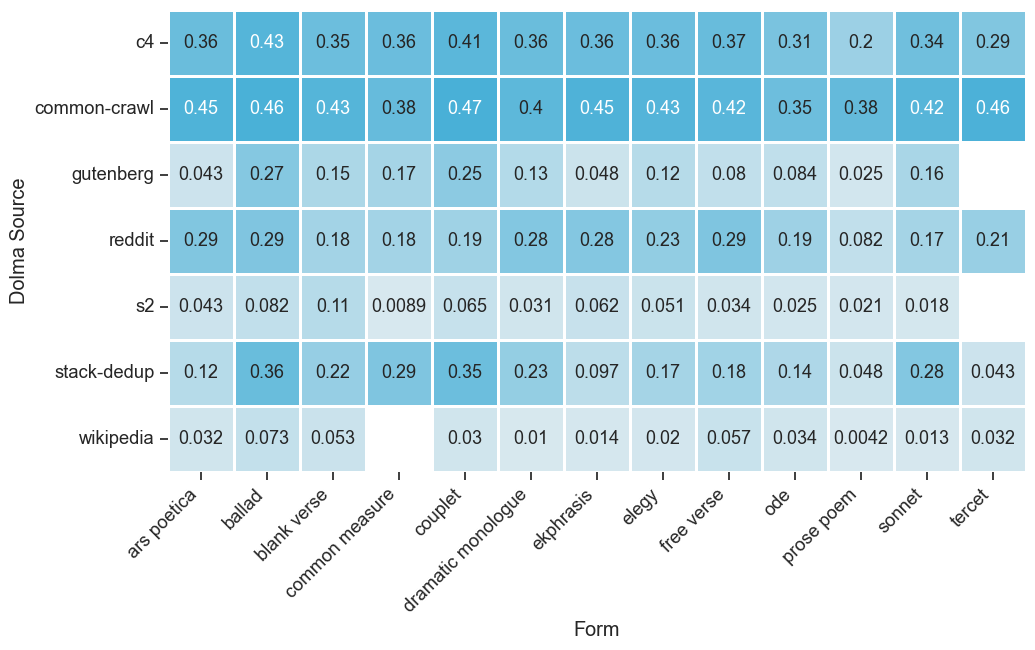

In [68]:
form_domain_percent_dict = defaultdict(lambda: defaultdict(float))

for _form, _domain_count_dict in form_domain_count_dict.items():
    for _domain, _count in _domain_count_dict.items():
        if form_detected_count_dict[_form] >= 40:
            # print(_count, form_detected_count_dict[_form])
            # form_domain_percent_dict[_form][_domain] = _count / float(form_detected_count_dict[_form])
            form_domain_percent_dict[_form][_domain] = _count / float(len(form_poems_dict[_form]))

dicts_to_plot = []
for _form, _domain_percent_dict in form_domain_percent_dict.items():
    for _domain, _percent in _domain_percent_dict.items():
        dicts_to_plot.append({'Form': _form,
                              'Dolma Source': _domain,
                              'Percent of Poems': _percent})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='Dolma Source', 
                                 columns='Form', 
                                 values='Percent of Poems')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,6))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap=sns.light_palette("#49b0d7", as_cmap=True), #'PiYG',
            center=0.2,
            cbar=False,
            square=True,
            annot=True,
            annot_kws={"fontsize":13}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.forms_x_sources.pdf', bbox_inches='tight')

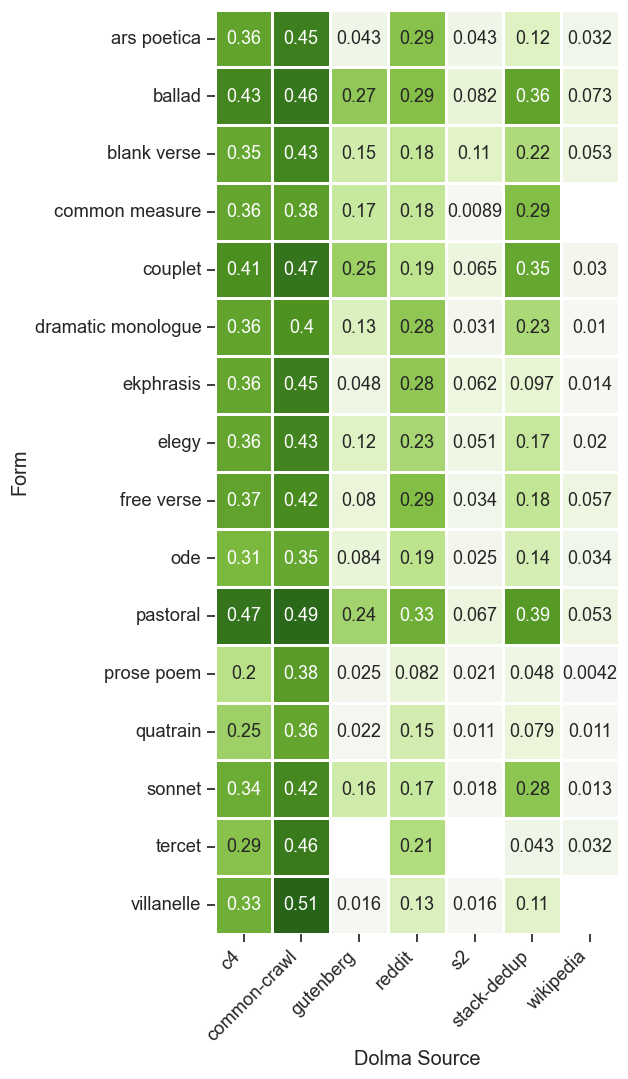

In [49]:
form_domain_percent_dict = defaultdict(lambda: defaultdict(float))

for _form, _domain_count_dict in form_domain_count_dict.items():
    for _domain, _count in _domain_count_dict.items():
        if form_detected_count_dict[_form] >= 30:
            # print(_count, form_detected_count_dict[_form])
            # form_domain_percent_dict[_form][_domain] = _count / float(form_detected_count_dict[_form])
            form_domain_percent_dict[_form][_domain] = _count / float(len(form_poems_dict[_form]))

dicts_to_plot = []
for _form, _domain_percent_dict in form_domain_percent_dict.items():
    for _domain, _percent in _domain_percent_dict.items():
        dicts_to_plot.append({'Form': _form,
                              'Dolma Source': _domain,
                              'Percent of Poems': _percent})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='Form', 
                                 columns='Dolma Source', 
                                 values='Percent of Poems')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(6, 12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='PiYG',
            center=0,
            cbar=False,
            square=True,
            annot=True,
            annot_kws={"fontsize":13}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.forms_x_sources.v.pdf', bbox_inches='tight')

## **Examine number of lines found**

In [56]:
# df_list = np.array_split(line_df, 10000)
# current_lines_df = pd.concat(df_list)

In [57]:
# target_poem_ids = list(current_lines_df['poem_id'].unique())
# len(target_poem_ids)

3684

In [74]:
poem_num_lines_dict = {}
for _poem_id in poems_df['poem_id'].unique():
    poem_num_lines_dict[_poem_id] = len(line_df[line_df['poem_id'] == _poem_id])
len(poem_num_lines_dict)

3692

In [85]:
poem_num_lines_found_dict = defaultdict(int)
poem_percent_found_dict = defaultdict(float)

for _poem_id, _num_lines in poem_num_lines_dict.items():

    if _num_lines > 0:

        _df = results_df[results_df['poem_id'] == _poem_id]

        _num_found = len(_df['line_num'].unique())

        poem_num_lines_found_dict[_poem_id] = _num_found
        poem_percent_found_dict[_poem_id] = _num_found / float(_num_lines)

len(poem_num_lines_found_dict), len(poem_percent_found_dict)

(3684, 3684)

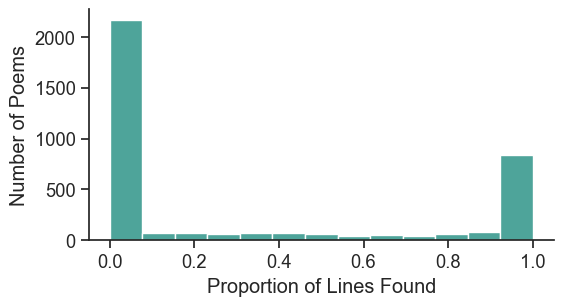

In [78]:
plt.figure(figsize=(6,3))
ax = sns.histplot(list(poem_percent_found_dict.values()), color='#128679')
plt.ylabel('Number of Poems')
plt.xlabel('Proportion of Lines Found')
sns.despine()
plt.savefig(output_directory_path + '/plots/histplot.num_poems_x_proportion_lines_found.pdf', bbox_inches='tight')

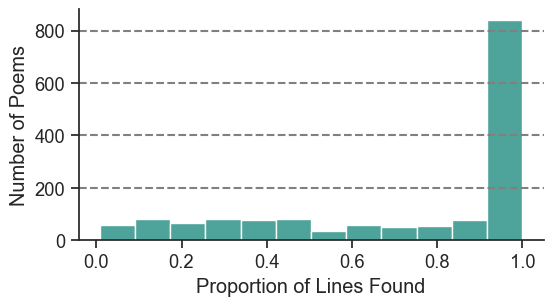

In [79]:
plt.figure(figsize=(6,3))
ax = sns.histplot([p for p in list(poem_percent_found_dict.values()) if p > 0], color='#128679')
plt.ylabel('Number of Poems')
plt.xlabel('Proportion of Lines Found')
plt.axhline(y=200, color='gray', linestyle='--')
plt.axhline(y=400, color='gray', linestyle='--')
plt.axhline(y=600, color='gray', linestyle='--')
plt.axhline(y=800, color='gray', linestyle='--')
sns.despine()
plt.savefig(output_directory_path + '/plots/histplot.num_poems_x_proportion_lines_found.non_zero.pdf', bbox_inches='tight')

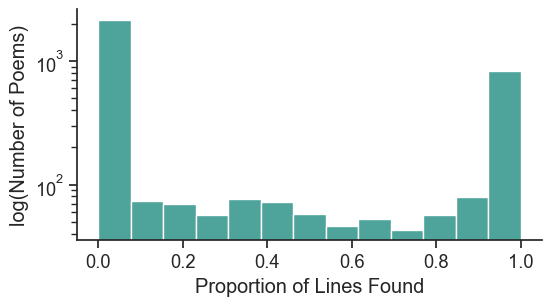

In [80]:
plt.figure(figsize=(6,3))
ax = sns.histplot(list(poem_percent_found_dict.values()), color='#128679')
plt.ylabel('log(Number of Poems)')
plt.xlabel('Proportion of Lines Found')
ax.set_yscale('log')
sns.despine()
plt.savefig(output_directory_path + '/plots/histplot.num_poems_x_proportion_lines_found.log.pdf', bbox_inches='tight')

sonnet
Percent Found:


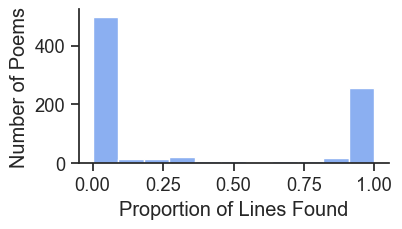

prose poem
Percent Found:


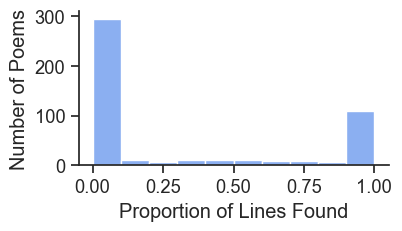

couplet
Percent Found:


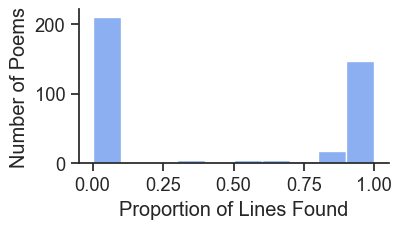

free verse
Percent Found:


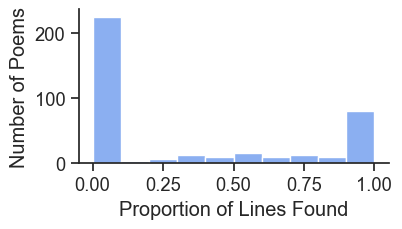

elegy
Percent Found:


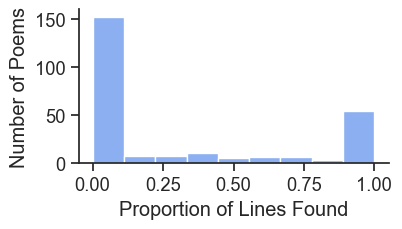

blank verse
Percent Found:


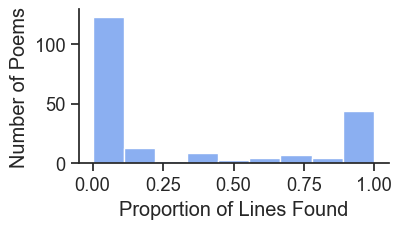

dramatic monologue
Percent Found:


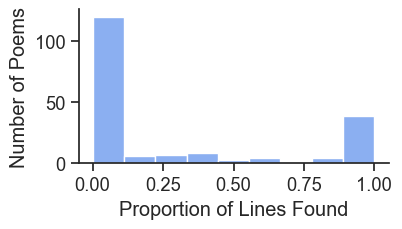

ekphrasis
Percent Found:


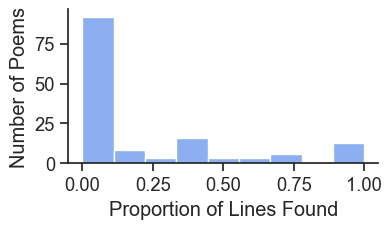

ode
Percent Found:


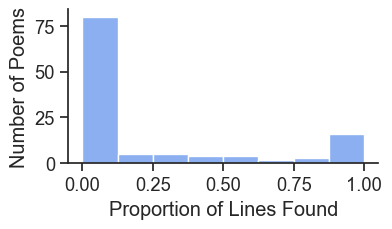

common measure
Percent Found:


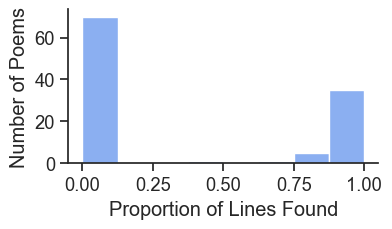

In [82]:
for _form, _poems in sorted(form_poems_dict.items(), key=lambda x: len(x[1]), reverse=True)[:10]:

    _poem_num_lines_found_dict = defaultdict(int)
    _poem_percent_found_dict = defaultdict(float)

    for _poem_id, _num_lines in poem_num_lines_dict.items():
        if _poem_id in _poems:

            if _num_lines > 0:

                _df = results_df[results_df['poem_id'] == _poem_id]
                
                _num_found = len(_df['line_num'].unique())

                _poem_num_lines_found_dict[_poem_id] = _num_found
                _poem_percent_found_dict[_poem_id] = _num_found / float(_num_lines)

    print(_form)
    print('Percent Found:', )

    plt.figure(figsize=(4,2))
    sns.histplot(list(_poem_percent_found_dict.values()), color='cornflowerblue')
    plt.ylabel('Number of Poems')
    plt.xlabel('Proportion of Lines Found')
    sns.despine()
    plt.show()

## **Examine number of poems found**

Where a poem is "found" if at least one of its lines is found.

In [88]:
poems_not_found = []
poems_found_count = 0
poems_not_found_count = 0
for _poem, _lines in poem_num_lines_dict.items():
    if poem_num_lines_found_dict[_poem] > 0:
        poems_found_count += 1
    else:
        poems_not_found_count += 1
        poems_not_found.append(_poem)

len(list(set(poems_not_found))), poems_found_count, poems_not_found_count, poems_found_count / (poems_found_count + poems_not_found_count), 1 - (poems_found_count / (poems_found_count + poems_not_found_count))

(2122, 1570, 2122, 0.42524377031419286, 0.5747562296858071)

In [89]:
output_file = open(output_directory_path + '/poems_not_found_in_dolma.txt', 'w')
for _poem in list(set(poems_not_found)):
    output_file.write(_poem.strip() + '\n')
output_file.close()

In [90]:
for _form, _poems in sorted(form_poems_dict.items(), key=lambda x: len(x[1]), reverse=True):

    _poems_found_count = 0
    _poems_not_found_count = 0
    for _poem, _lines in poem_num_lines_dict.items():
        if _poem in _poems:
            if poem_num_lines_found_dict[_poem] > 0:
                _poems_found_count += 1
            else:
                _poems_not_found_count += 1

    print(_form)
    print('N Poems Found:', _poems_found_count)
    print('N Poems NOT Found:', _poems_not_found_count)
    print('% Poems Found:', round((_poems_found_count / (_poems_found_count + _poems_not_found_count))*100, 1), '%')
    print()

sonnet
N Poems Found: 365
N Poems NOT Found: 492
% Poems Found: 42.6 %

prose poem
N Poems Found: 186
N Poems NOT Found: 289
% Poems Found: 39.2 %

couplet
N Poems Found: 188
N Poems NOT Found: 210
% Poems Found: 47.2 %

free verse
N Poems Found: 163
N Poems NOT Found: 224
% Poems Found: 42.1 %

elegy
N Poems Found: 110
N Poems NOT Found: 144
% Poems Found: 43.3 %

blank verse
N Poems Found: 90
N Poems NOT Found: 119
% Poems Found: 43.1 %

dramatic monologue
N Poems Found: 77
N Poems NOT Found: 114
% Poems Found: 40.3 %

ekphrasis
N Poems Found: 65
N Poems NOT Found: 80
% Poems Found: 44.8 %

ode
N Poems Found: 42
N Poems NOT Found: 77
% Poems Found: 35.3 %

common measure
N Poems Found: 42
N Poems NOT Found: 70
% Poems Found: 37.5 %

ballad
N Poems Found: 51
N Poems NOT Found: 59
% Poems Found: 46.4 %

ars poetica
N Poems Found: 42
N Poems NOT Found: 52
% Poems Found: 44.7 %

tercet
N Poems Found: 43
N Poems NOT Found: 51
% Poems Found: 45.7 %

quatrain
N Poems Found: 32
N Poems NOT F